In [1]:
# global imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 

In [13]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names, index=None)
df['Type'] = data.target
X_train, X_test, y_train, y_test = train_test_split(df.drop('Type', axis=1), df['Type'], test_size=0.2, random_state=42)
classes = data.target_names

In [16]:
pca = PCA(n_components = 3)
result = pca.fit_transform(df.loc[:, df.columns != 'Type'])
df['pca-1'] = result[:, 0]
df['pca-2'] = result[:, 1]
df['pca-3'] = result[:, 2]

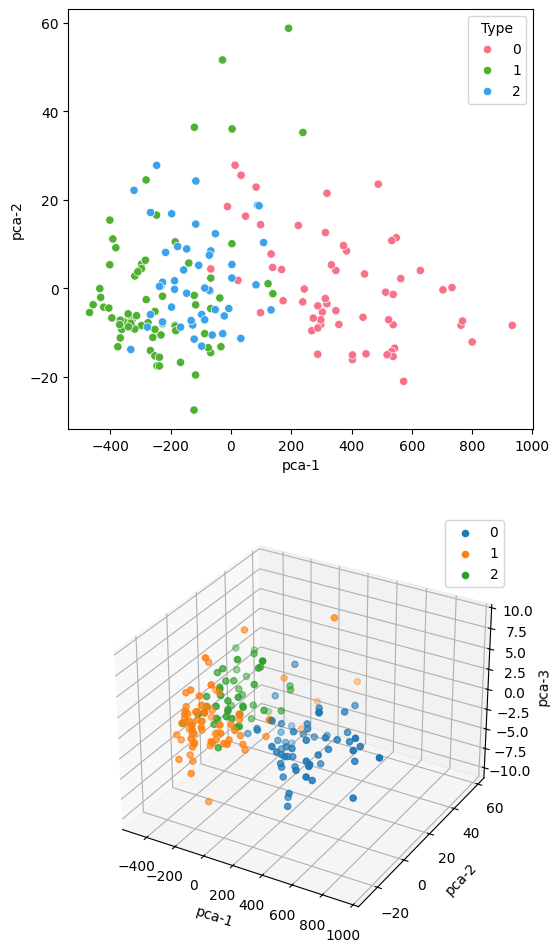

In [55]:
fig = plt.figure(figsize = (6, 12))
plt.subplots_adjust(right=None)
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('2D-Plot of PCA')
sns.scatterplot(data = df, x = 'pca-1', y = 'pca-2', hue = 'Type', palette = sns.color_palette("husl", len(classes)), legend = 'full')
ax2 = fig.add_subplot(2, 1, 2, projection = '3d')
ax2.set_title('#3D-Plot of PCA')
ax2.scatter(data = df[df['Type'] == 0], xs = 'pca-1', ys = 'pca-2', zs = 'pca-3', label = '0')
ax2.scatter(data = df[df['Type'] == 1], xs = 'pca-1', ys = 'pca-2', zs = 'pca-3', label = '1')
ax2.scatter(data = df[df['Type'] == 2], xs = 'pca-1', ys = 'pca-2', zs = 'pca-3', label = '2')
ax2.legend()
ax2.set_xlabel('pca-1')
ax2.set_ylabel('pca-2')
ax2.set_zlabel('pca-3')
plt.show()